In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
data = pd.read_csv("TaitanicData/data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#对数据集进行预处理
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


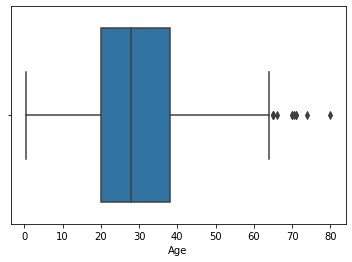

In [5]:
ax = sns.boxplot(x=data["Age"])

In [6]:
#处理数据
#去掉必要的行
data.drop(['PassengerId','Ticket','Cabin'],inplace=True,axis=1)
#填补缺失值
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
#处理Name
def getPrefix(s):
    strs = s.split(',')
    name = strs[1].strip()
    prefix = name.split('.')[0]
    return prefix
nameDf = pd.DataFrame()
nameDf['Name'] = data['Name'].map(lambda s:getPrefix(s))
prefix_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
nameDf['Name'] = nameDf['Name'].map(prefix_mapDict)
data.drop('Name',inplace=True,axis=1)
data = pd.concat([data,nameDf],axis=1)

In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name          0
dtype: int64

In [9]:
data['Embarked'].value_counts()
data['Embarked'] = data['Embarked'].fillna(value='S')
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean)

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Name          0
dtype: int64

In [11]:
# #将二分类变量转换成为数值型变量
# data["Sex"] = (data["Sex"]=="male").astype("int")
# #将n分类变量转换为数值型变量
# labels = data["Name"].unique().tolist()
# data["Name"] = data["Name"].apply(lambda x: labels.index(x))
# labels = data["Embarked"].unique().tolist()
# data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
# data.head()
nameDf = pd.get_dummies(data["Name"],prefix="Name")
data = pd.concat([data,nameDf],axis=1)
sexDf = pd.get_dummies(data["Sex"],prefix="Sex")
data = pd.concat([data,sexDf],axis=1)
embarkedDf = pd.get_dummies(data["Embarked"],prefix="Embarked")
data = pd.concat([data,embarkedDf],axis=1)
data.drop(["Name","Sex","Embarked"],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,1


In [13]:
data.shape

(891, 17)

In [14]:
agePredData = data.iloc[:,data.columns != "Survived"]
#step1:
data_full=agePredData.drop(labels='Age',axis=1)
#step2:
data_nan=agePredData.loc[:,'Age']
#区别我们的训练集和测试集
Ytrain = data_nan[data_nan.notnull()]
Ytest = data_nan[data_nan.isnull()]
Xtrain = data_full.iloc[Ytrain.index]
Xtest = data_full.iloc[Ytest.index]
#用随机森林回归来填补缺失值
rfc = RandomForestRegressor(n_estimators=100)
rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)
Ypredict.size

177

In [15]:
Ytest.size

177

In [16]:
data_nan[data_nan.isnull()] = Ypredict

/Users/etsugatsukoshietsu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/etsugatsukoshietsu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/etsugatsukoshietsu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/panda

In [17]:
data['Age'] = agePredData['Age']

In [18]:
data.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Name_Master     0
Name_Miss       0
Name_Mr         0
Name_Mrs        0
Name_Officer    0
Name_Royalty    0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [19]:
#提取标签和特征矩阵，分测试集和训练集
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)
Xtrain.shape

(623, 16)

In [20]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,1


In [21]:
#修正测试集和训练集的索引
#如何修正？这里的修正是什么意思？
#i.reset_index(drop=True,inplace = True)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,45.500000,0,0,7.2250,0,0,1,0,0,0,0,1,1,0,0
1,3,30.000000,1,0,16.1000,0,0,1,0,0,0,0,1,0,0,1
2,3,20.247103,0,0,7.8792,0,1,0,0,0,0,1,0,0,1,0
3,2,32.000000,2,0,73.5000,0,0,1,0,0,0,0,1,0,0,1
4,3,24.000000,1,0,16.1000,0,0,1,0,0,0,0,1,0,0,1


In [22]:
#导入模型，粗略跑一下查看结果
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)
score_

0.7686567164179104

In [23]:
score = cross_val_score(clf,X,y,cv=10).mean()
score

0.7766868119396209

0.8260384746339803


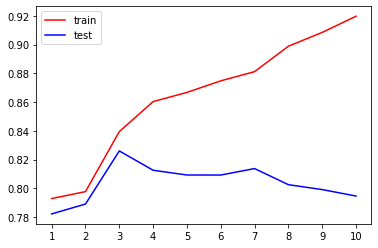

In [24]:
#在不同的max_depth下观察模型的拟合状况
import matplotlib.pyplot as plt
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy")
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

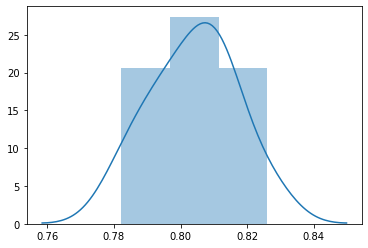

In [25]:
sns.distplot(te)

In [26]:
#网格搜索调整参数
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
#一些参数和这些参数可能的取值
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
}
clf = DecisionTreeClassifier(random_state=25,max_depth=3)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

/Users/etsugatsukoshietsu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=25,
                                              splitter='best'),
             iid='warn', n_job...
                                                   0.23684210526315788,
                                                   0.2631578947368421,
 

In [27]:
GS.best_score_ #网格搜索后模型的

0.8378812199036918

In [28]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'entropy',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [29]:
clf = DecisionTreeClassifier(random_state=25,max_depth=3,criterion='gini',min_samples_leaf=1,splitter='best')
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)
score_

0.8059701492537313

In [57]:
test = pd.read_csv("TaitanicData/test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
#去掉必要的行
test.drop(['PassengerId','Ticket','Cabin'],inplace=True,axis=1)
def getPrefix(s):
    strs = s.split(',')
    name = strs[1].strip()
    prefix = name.split('.')[0]
    return prefix
nameDf = pd.DataFrame()
nameDf['Name'] = test['Name'].map(lambda s:getPrefix(s))
prefix_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
nameDf['Name'] = nameDf['Name'].map(prefix_mapDict)
test.drop('Name',inplace=True,axis=1)
nameDf.head()
test['Name'] = nameDf['Name']

In [60]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [61]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [62]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [63]:
nameDf = pd.get_dummies(test["Name"],prefix="Name")
test = pd.concat([test,nameDf],axis=1)
test.head()
sexDf = pd.get_dummies(test["Sex"],prefix="Sex")
test = pd.concat([test,sexDf],axis=1)
embarkedDf = pd.get_dummies(test["Embarked"],prefix="Embarked")
test = pd.concat([test,embarkedDf],axis=1)
test.drop(["Name","Sex","Embarked"],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,1,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,1,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,0,0,1,0,0,0,1


In [64]:
test.shape

(418, 16)

In [65]:
agePredData = test.iloc[:,test.columns != "Survived"]
#step1:
data_full=agePredData.drop(labels='Age',axis=1)
#step2:
data_nan=agePredData.loc[:,'Age']
# 区别我们的训练集和测试集
# Ytrain = data_nan[data_nan.notnull()]
Ytest = data_nan[data_nan.isnull()]
# Xtrain = data_full.iloc[Ytrain.index]
Xtest = data_full.iloc[Ytest.index]
# 用随机森林回归来填补缺失值
# rfc = RandomForestRegressor(n_estimators=100)
# rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)
Ypredict
agePredData

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Royalty,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,1,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,1,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0,1,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,0,1,0,0,0,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,1


In [66]:
data_nan[data_nan.isnull()] = Ypredict

/Users/etsugatsukoshietsu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
test['Age'] = agePredData['Age']

In [72]:
X = test.iloc[:,test.columns != "Survived"]
y = test.iloc[:,test.columns == "Survived"]
pred_Y = clf.predict(X)

In [73]:
list(range(1,10)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [75]:
predDf=pd.DataFrame({'PassengerId':list(range(892,1310)),'Survived':pred_Y})
predDf.shape
predDf.head()
predDf.to_csv('titanic_pred.csv',index=False)